
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
medical_df = pd.read_csv('medical-charges.csv')

In [ ]:
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Розбити дані на різні категорії (по віку - розбити на діапазони, інші категорії - такі, як вказані в таблиці)
2. Проаналізувати викиди, побудувати різні графіки, боксплоти, діаграми
3. Проаналізувати залежність між charges та іншими колонками, яка між ними кореляція
4. На основі отриманих кореляцій будувати ціну, наприклад можна брати середнє значення для певної категорії (наприклад, у нас чоловік віком 30-40 років, що палить, і ми знаємо, що є досить сильна кореляція між виплати та вік та між виплатами й статтю, а між виплатами та курінням немає сильної кореляції; тоді дивимось скільки в середньому платять чоловіки в діапазоні 30-40)
5. Можна виявити найбільш впливові фактори (упорядкувати колонки за спаданням кореляції з колонкою charges) та визначати середню ціну за середнім по тій колонці, яка найбільше корелює з charges (наприклад, якщо серед факторів "чоловік", "вік 30-40 років" та "палить" найбільш впливовим фактором є вік, то визначаємо ціну виплат як середнє по колонці "30-40 років")

In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

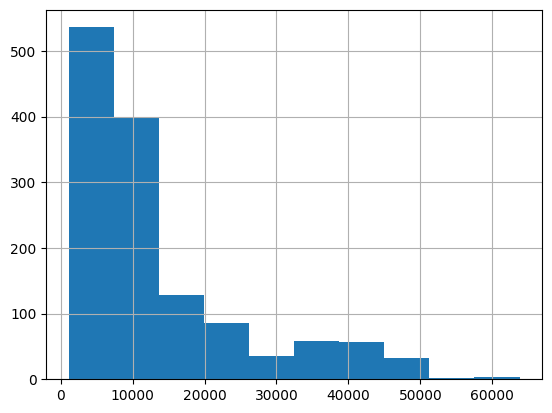

In [ ]:
medical_df.charges.hist()

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
medical_df.sex.describe()

,sex
count,1338
unique,2
top,male
freq,676


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження з вищенаведеного графіку:**

- Для більшості клієнтів річні медичні збори становлять менше \$14,000. Тільки невелика частина клієнтів має вищі медичні збори

- Немає значної різниці в медичних зборах між жінками та чоловіками, медіана для чоловіків та для жінок приблизно становить \$9400.

- Річні медичні збори серед чоловіків мають більші вуса, що сягають аж до \$40,000, тоді як розкид значень для жінок сягає приблизно до \$29,000.

- Є досить багато викидів як для чоловіків, так і для жінок, більшість викидів серед чоловіків зосереджені в діапазоні від \$40,000 до \$50,000, а більшість викидів серед жінок зосереджені в діапазоні від \$29,000 до \$49,000. У жінок викиди менш екстремальні.


In [ ]:
medical_df.region.describe()

,region
count,1338
unique,4
top,southeast
freq,364


In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'pink', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження з вищенаведеного графіку:**

- Більшість клієнтів у всіх регіонах мають річні медичні збори менші за \$14,000

- Є невелика різниця в медичних зборах між людьми з річних регіонів, медіани різних медичних зборів мають такий вигляд: \\
southwest ~ \$8800; \\
southeast ~ \$9300; \\
northwest ~ \$9000; \\
northeast ~ \$10,100.

- Річні медичні збори для людей з southwest мають найбільш вузький розподіл та сягають приблизно до \$26,200, тоді як розкид значень для людей з southeast сягає приблизно до \$42,200.

- Серед людей з усіх регіонів є досить багато викидів, переважно в діапазоні від \$35,000 до \$50,000. Найбільше таких викидів спостерігається серед людей з northeast та southeast.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
medical_df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
px.histogram(medical_df, x='smoker', color='region', title='Smoker')

**Висновок**

- Виглядає, що ~20% клієнтів повідомили, що вони курять.

- Куріння здається найбільш поширеним серед людей з southeast (з цього регіону опитали приблизно на 40 людей більше, ніж з інших регіонів по окремості, а при цьому різниця в кількості курців у порівнянні з іншими регіонами становить 24-33 людини).

- Найменш поширене куріння в регіонах northwest та southwest

- У випадку роботи з подібними даними ми могли б це додатково перевірити на офіційній статистиці в країні.

In [ ]:
medical_df.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [ ]:
px.histogram(medical_df, x='smoker', color='children', title='Smoker')

**Висновок**

- Серед людей, що мають 4 чи 5 дітей, найменший відсоток курців (12% та ~6% відповідно в межах кожної окремої групи).

- Серед людей, що мають 2 чи 3 дітей, найбільший відсоток курців серед своєї групи (~23% та ~25% відповідно в межах кожної окремої групи).

- Серед людей, що мають 1 дитину чи зовсім не мають дітей, приблизно однаковий відсоток курців серед своєї групи (~20% в межах кожної окремої групи).

- У випадку роботи з подібними даними ми могли б це додатково перевірити на офіційній статистиці в країні.

- Варто також подивитись на додаткові чинники щодо людей, які мають 4 чи більше дитини, бо серед них значно менше курців. Наприклад, в певних регіонах може бути багато вріуючих людей, які не курять та в яких досить багато дітей.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
px.violin(medical_df, x='charges', color='children', title='Charges')

**Висновок**

- Річні медичні збори для людей, що мають 5 дітей, чітко зосереджені в межах від \$750 до \$23,000, для цієї категорії людей немає викидів, значення щільно зосереджені
- Найбільший розкид значень річних медичних зборів для людей, що не мають дітей та для людей, що мають 1, 2 чи 3 дітини. Ймовірно це тому, що таких людей у цілому більшість, тому варто аналізувати додаткові чинники, які впливають на їх річні медичні збори
- У людей, що мають 4 дитини, річні медичні збори не перевищують \$48,400
- Для людей, що не мають дітей, найбільша густина в нижчих значеннях (~до \$15,000), але маємо довгий хвіст до \$69,000.
- Можемо зробити висновок, що кількість дітей не є прямим чинником високих витрат, а розкид пов'язаний з іншими факторами.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

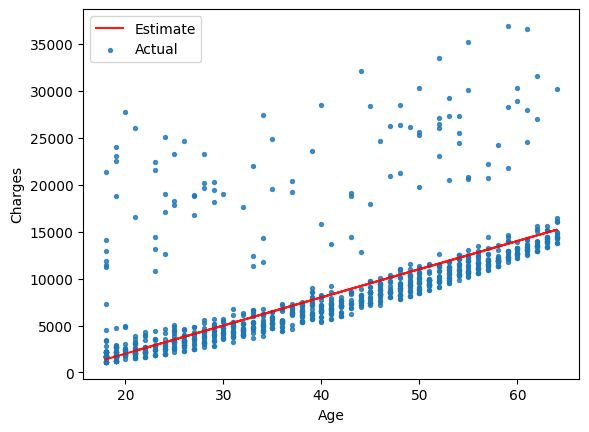

In [ ]:
try_parameters(300,-4000)

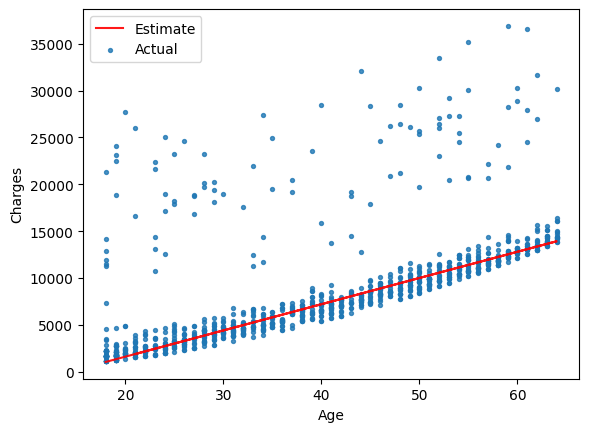

In [ ]:
try_parameters(280,-4000)

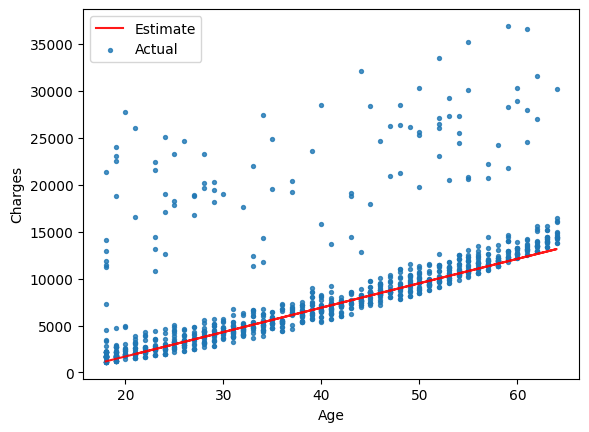

In [ ]:
try_parameters(260,-3500)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4725.9133994520325


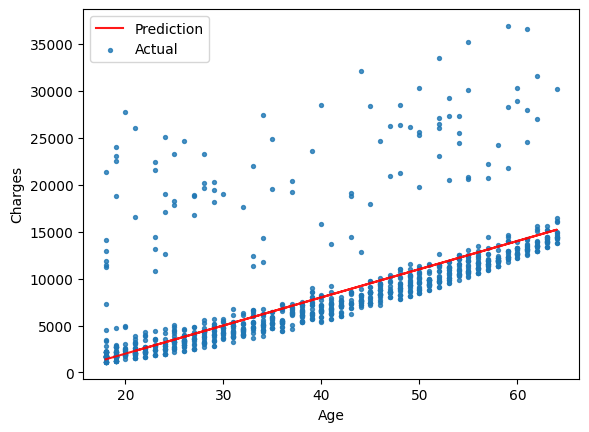

In [ ]:
try_parameters(300, -4000)

RMSE Loss:  4873.301227056433


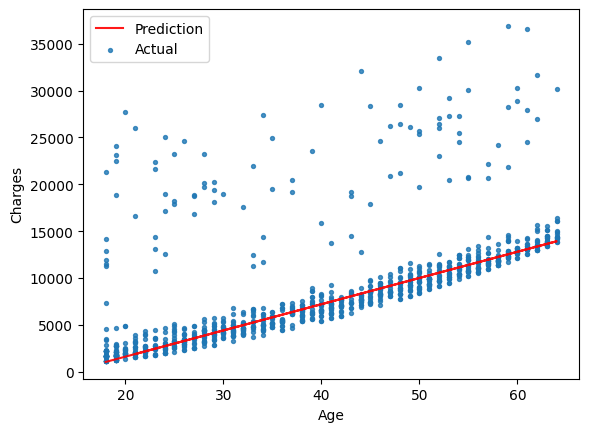

In [ ]:
try_parameters(280, -4000)

RMSE Loss:  4961.782001863074


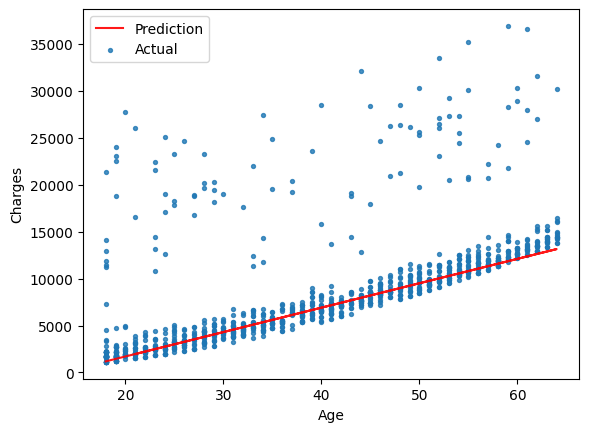

In [ ]:
try_parameters(260,-3500)

**Стратегія пошуку прямої**

- спочатку малюємо будь-яку пряму
- дивимось на кут нахилу прямої, регулюємо його за допомогою першого коефіцієнта w
- регуляємо на якій висоті буде пряма за допомогою другого коефіцієнта b